In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

(1200, 1600, 3)


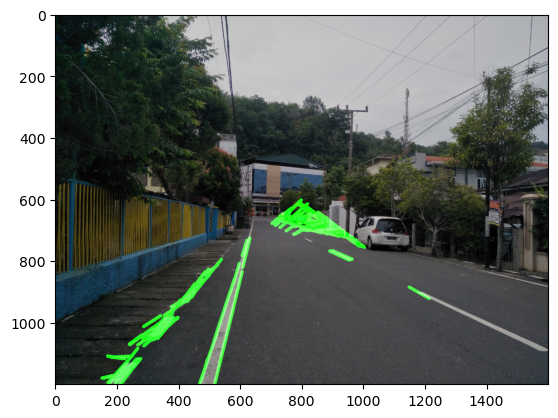

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    match_mask_color = 255
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

def draw_the_lines(img, lines):
    img = np.copy(img)
    blank_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

    if lines is not None:  # Tambahkan pengecekan apakah lines tidak None
        for line in lines:
            for x1, y1, x2, y2 in line:
                cv2.line(blank_image, (x1, y1), (x2, y2), (0, 255, 0), thickness=10)

    img = cv2.addWeighted(img, 0.8, blank_image, 1, 0.0)
    return img

image = cv2.imread('jalan3.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)
height = image.shape[0]
width = image.shape[1]
region_of_interest_vertices = [
    (0, height),
    (width // 2, height // 2),
    (width, height)
]
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
canny_image = cv2.Canny(gray_image, 100, 200)
cropped_image = region_of_interest(canny_image, np.array([region_of_interest_vertices], np.int32))
lines = cv2.HoughLinesP(cropped_image, rho=6, theta=np.pi/180, threshold=160, lines=np.array([]), minLineLength=40, maxLineGap=25)
image_with_lines = draw_the_lines(image, lines)

plt.imshow(image_with_lines)
plt.show()
